#**Análises bibliométricas para mapeamento científico da pesquisa sobre respostas a derramamento de óleo:**



*   Compound Annual Growth Rate (CAGR)
*   Annual Growth Rate
*   Plots
*   wordclouds


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from wordcloud import WordCloud
from google.colab import files

In [ ]:
df_scopus_300424 = pd.read_csv("/content/scopus300424_1004docs_t_osr_semduplicatas.csv")

In [ ]:
# Visualização das primeiras 5 linhas do conjunto de dados
df_scopus_300424.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Grechishcheva N.Yu.; Korolev A.M.; Zavorotny V...,"Grechishcheva, N.Yu. (6506505881); Korolev, A....",6506505881; 58045467900; 57219162635; 58045851...,stabilization of oil-in-water emulsions with h...,2023,ChemChemTech,66,2,NaN,23,...,NaN,NaN,NaN,English,ChemChemTech,Article,Final,NaN,Scopus,2-s2.0-85145817421
1,Hasan M.I.; Aggarwal S.,"Hasan, Md Ibnul (57920061700); Aggarwal, Srija...",57920061700; 16038160400,in situ burning for oil spill response in the ...,2023,Archives of Environmental Contamination and To...,84,1,NaN,153,...,NaN,AECTC,36207538.0,English,Arch. Environ. Contam. Toxicol.,Article,Final,NaN,Scopus,2-s2.0-85139472055
2,Das T.; Goerlandt F.,"Das, Tanmoy (57226797978); Goerlandt, Floris (...",57226797978; 36504143700,bayesian inference modeling to rank response t...,2022,Marine Pollution Bulletin,185,NaN,114203,NaN,...,NaN,MPNBA,36272316.0,English,Mar. Pollut. Bull.,Article,Final,NaN,Scopus,2-s2.0-85140099761
3,Letendre F.; Ramos P.A.S.; Cameron C.B.,"Letendre, Francis (57200414616); Ramos, Paloma...",57200414616; 58316661000; 57210868446,the loss of crude oil droplets by filter feede...,2023,Marine Pollution Bulletin,193,NaN,115174,NaN,...,NaN,MPNBA,37336047.0,English,Mar. Pollut. Bull.,Article,Final,NaN,Scopus,2-s2.0-85162077483
4,Li W.; Yu Y.; Xiong D.; Qi Z.; Wang W.; Qi Y.,"Li, Wenxin (57210647142); Yu, Yue (57206250592...",57210647142; 57206250592; 22735957700; 5720992...,effects of oil properties on the formation of ...,2022,Journal of Hazardous Materials,436,NaN,129227,NaN,...,NaN,JHMAD,35739747.0,English,J. Hazard. Mater.,Article,Final,NaN,Scopus,2-s2.0-85131656649


In [ ]:
# Contar o número de publicações por ano
publications_per_year = df_scopus_300424.groupby('Year').size().reset_index(name='Publications')

# Calcular o total de publicações
total_publications = publications_per_year['Publications'].sum()

# Calcular o percentual de publicações por ano
publications_per_year['Percentage'] = (publications_per_year['Publications'] / total_publications) * 100

# Exibir os dados com o percentual calculado
print("\nPercentual de Artigos Publicados por Ano:")
print(publications_per_year)


Percentual de Artigos Publicados por Ano:
    Year  Publications  Percentage
0   1973             1    0.099701
1   1980             2    0.199402
2   1982             2    0.199402
3   1983             4    0.398804
4   1984             3    0.299103
5   1985             4    0.398804
6   1986             1    0.099701
7   1987             1    0.099701
8   1988             1    0.099701
9   1989             1    0.099701
10  1990             3    0.299103
11  1991             6    0.598205
12  1992             9    0.897308
13  1993            12    1.196411
14  1994            10    0.997009
15  1995            18    1.794616
16  1996             9    0.897308
17  1997            11    1.096710
18  1998             8    0.797607
19  1999            24    2.392822
20  2000            22    2.193420
21  2001            17    1.694915
22  2002            22    2.193420
23  2003            21    2.093719
24  2004            19    1.894317
25  2005            10    0.997009
26  2006    

In [ ]:
publications_per_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          44 non-null     int64  
 1   Publications  44 non-null     int64  
 2   Percentage    44 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.2 KB


In [ ]:
total = publications_per_year['Percentage'].sum()
total

100.0

In [ ]:
# Agrupar os dados por ano e contar as publicações para análises por ano
publicacoes_por_ano = df_scopus_300424.groupby('Year').size()

In [ ]:
# Obter o primeiro e o último ano com publicações
ano_inicial = publicacoes_por_ano.index.min()
ano_final = publicacoes_por_ano.index.max()

# Obter o número de publicações no primeiro e no último ano
publicacoes_inicial = publicacoes_por_ano.loc[ano_inicial]
publicacoes_final = publicacoes_por_ano.loc[ano_final]

# Calcular o número total de anos
periodo = ano_final - ano_inicial

# Calcular a CAGR
cagr = (publicacoes_final / publicacoes_inicial) ** (1 / periodo) - 1
cagr_percentual = cagr * 100  # Convertendo para porcentagem

print(f"A taxa de crescimento anual composta (CAGR) das publicações é de {cagr_percentual:.2f}% ao ano.")

A taxa de crescimento anual composta (CAGR) das publicações é de 8.71% ao ano.


In [ ]:
# Definir as décadas de interesse
decadas = {
    '1973-1982': (1973, 1982),
    '1983-1992': (1983, 1992),
    '1993-2002': (1993, 2002),
    '2003-2012': (2003, 2012),
    '2013-2023': (2013, 2023)
}

# Função para calcular a CAGR
def calcular_cagr(inicial, final, periodo):
    return (final / inicial) ** (1 / periodo) - 1

In [ ]:
# Calcular a CAGR para cada década
cagr_decadas = {}

for decada, (inicio, fim) in decadas.items():
    # Filtrar os anos da década
    publicacoes_decada = publicacoes_por_ano[(publicacoes_por_ano.index >= inicio) & (publicacoes_por_ano.index <= fim)]

    # Verificar se há publicações no início e no final da década
    if not publicacoes_decada.empty and publicacoes_decada.loc[inicio] > 0 and publicacoes_decada.loc[fim] > 0:
        publicacoes_inicial = publicacoes_decada.loc[inicio]
        publicacoes_final = publicacoes_decada.loc[fim]
        periodo = fim - inicio

        # Calcular a CAGR
        cagr = calcular_cagr(publicacoes_inicial, publicacoes_final, periodo)
        cagr_percentual = cagr * 100  # Convertendo para porcentagem

        cagr_decadas[decada] = cagr_percentual

# Exibir a CAGR para cada década
for decada, cagr_percentual in cagr_decadas.items():
    print(f"A taxa de crescimento anual composta (CAGR) das publicações de {decada} é de {cagr_percentual:.2f}% ao ano.")

A taxa de crescimento anual composta (CAGR) das publicações de 1973-1982 é de 8.01% ao ano.
A taxa de crescimento anual composta (CAGR) das publicações de 1983-1992 é de 9.43% ao ano.
A taxa de crescimento anual composta (CAGR) das publicações de 1993-2002 é de 6.97% ao ano.
A taxa de crescimento anual composta (CAGR) das publicações de 2003-2012 é de 1.49% ao ano.
A taxa de crescimento anual composta (CAGR) das publicações de 2013-2023 é de 9.18% ao ano.


In [ ]:
# Definir os anos de interesse
anos_interesse = [1991, 1998, 2010, 2019]

# Criar dicionários para armazenar os subconjuntos de dados
subconjuntos = {}
subconjuntos_ano_anterior = {}
subconjuntos_ano_posterior = {}

# Função para criar subconjuntos de dados
def criar_subconjuntos(df, ano):
    ano_anterior = ano - 1
    ano_posterior = ano + 1

    subconjunto = df[df['Year'] == ano]
    subconjunto_anterior = df[df['Year'] == ano_anterior]
    subconjunto_posterior = df[df['Year'] == ano_posterior]

    return subconjunto, subconjunto_anterior, subconjunto_posterior

# Iterar sobre os anos de interesse e criar os subconjuntos
for ano in anos_interesse:
    subconjuntos[ano], subconjuntos_ano_anterior[ano], subconjuntos_ano_posterior[ano] = criar_subconjuntos(df_scopus_300424, ano)

# Exibir os tamanhos dos resultados
for ano in anos_interesse:
    print(f"\nTamanho do subconjunto de dados para o ano {ano}: {len(subconjuntos[ano])} artigos")
    print(f"Tamanho do subconjunto de dados para o ano anterior {ano-1}: {len(subconjuntos_ano_anterior[ano])} artigos")
    print(f"Tamanho do subconjunto de dados para o ano posterior {ano+1}: {len(subconjuntos_ano_posterior[ano])} artigos")

# Opcional: Salvar os subconjuntos de dados em arquivos CSV
for ano in anos_interesse:
    subconjuntos[ano].to_csv(f'subconjunto_{ano}.csv', index=False)
    subconjuntos_ano_anterior[ano].to_csv(f'subconjunto_{ano-1}.csv', index=False)
    subconjuntos_ano_posterior[ano].to_csv(f'subconjunto_{ano+1}.csv', index=False)


Tamanho do subconjunto de dados para o ano 1991: 6 artigos
Tamanho do subconjunto de dados para o ano anterior 1990: 3 artigos
Tamanho do subconjunto de dados para o ano posterior 1992: 9 artigos

Tamanho do subconjunto de dados para o ano 1998: 8 artigos
Tamanho do subconjunto de dados para o ano anterior 1997: 11 artigos
Tamanho do subconjunto de dados para o ano posterior 1999: 24 artigos

Tamanho do subconjunto de dados para o ano 2010: 51 artigos
Tamanho do subconjunto de dados para o ano anterior 2009: 17 artigos
Tamanho do subconjunto de dados para o ano posterior 2011: 46 artigos

Tamanho do subconjunto de dados para o ano 2019: 56 artigos
Tamanho do subconjunto de dados para o ano anterior 2018: 60 artigos
Tamanho do subconjunto de dados para o ano posterior 2020: 52 artigos


In [ ]:
# Definir os anos de interesse
anos_interesse = [1991, 1998, 2010, 2019]

# Criar um dicionário para armazenar os subconjuntos combinados
subconjuntos_combinados = {}

# Função para criar subconjuntos combinados de dados
def criar_subconjuntos_combinados(df, ano):
    anos = [ano - 1, ano, ano + 1]
    subconjunto_combinado = df[df['Year'].isin(anos)]
    return subconjunto_combinado

# Iterar sobre os anos de interesse e criar os subconjuntos combinados
for ano in anos_interesse:
    subconjuntos_combinados[ano] = criar_subconjuntos_combinados(df_scopus_300424, ano)

# Exibir os tamanhos dos subconjuntos combinados
for ano in anos_interesse:
    tamanho = len(subconjuntos_combinados[ano])
    print(f"\nTamanho do subconjunto combinado de dados para {ano-1}, {ano}, {ano+1}: {tamanho} artigos")

# Opcional: Salvar os subconjuntos combinados de dados em arquivos CSV
for ano in anos_interesse:
    subconjuntos_combinados[ano].to_csv(f'subconjunto_combinado_{ano-1}_{ano}_{ano+1}.csv', index=False)


Tamanho do subconjunto combinado de dados para 1990, 1991, 1992: 18 artigos

Tamanho do subconjunto combinado de dados para 1997, 1998, 1999: 43 artigos

Tamanho do subconjunto combinado de dados para 2009, 2010, 2011: 114 artigos

Tamanho do subconjunto combinado de dados para 2018, 2019, 2020: 168 artigos


   Year         Word  Frequency
0  1990        MODEL          0
1  1991        MODEL          3
2  1992        MODEL         19
3  1990  CONTINGENCY          2
4  1991  CONTINGENCY          3
   Year         Word  Frequency  Publications
0  1990        MODEL          0             3
1  1991        MODEL          3             6
2  1992        MODEL         19             9
3  1990  CONTINGENCY          2             3
4  1991  CONTINGENCY          3             6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

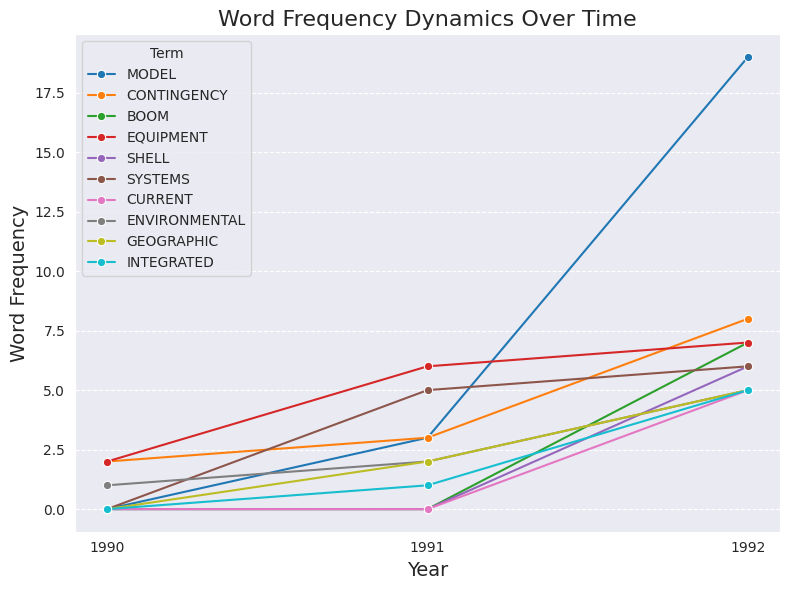

In [ ]:
# Carregar os dados do arquivo CSV da dinâmica de palavras
df_word_dynamics = pd.read_csv('/content/Word_Dynamics_1990-1992.csv')

# Transformar os dados em formato longo
df_long = df_word_dynamics.melt(id_vars='Year', var_name='Word', value_name='Frequency')

# Verificar a estrutura dos dados transformados
print(df_long.head())

# Carregar os dados de publicações por ano
publications_per_year = df_scopus_300424.groupby('Year').size().reset_index(name='Publications')

# Combinar os dados de dinâmica de palavras com o número de artigos por ano
df_combined = pd.merge(df_long, publications_per_year, on='Year', how='left')

# Verificar os dados combinados
print(df_combined.head())

# Plotar a frequência das palavras ao longo dos anos
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")

# Gráfico de linha para a frequência de palavras
sns.lineplot(data=df_combined, x='Year', y='Frequency', hue='Word', marker='o')

# Ajustar os labels e o título do gráfico
plt.title('Word Frequency Dynamics Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Word Frequency', fontsize=14)

# Ajustar o eixo x para mostrar apenas os anos sem frações
plt.xticks(df_combined['Year'].unique())

# Ajustar a posição da legenda para que não encubra os dados
plt.legend(loc='upper left', title='Term')

# Remover as linhas do grid que estão encobrindo a legenda
plt.grid(axis='x')
plt.grid(axis='y', linestyle='--')

# Mostrar o gráfico
plt.tight_layout()

plt.savefig('Word Frequency_1990-1992.png')
files.download('Word Frequency_1990-1992.png')
plt.show()

   Year           Word  Frequency
0  1997           BOOM          9
1  1998           BOOM          9
2  1999           BOOM         26
3  1997  ENVIRONMENTAL          4
4  1998  ENVIRONMENTAL          7
   Year           Word  Frequency  Publications
0  1997           BOOM          9            11
1  1998           BOOM          9             8
2  1999           BOOM         26            24
3  1997  ENVIRONMENTAL          4            11
4  1998  ENVIRONMENTAL          7             8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

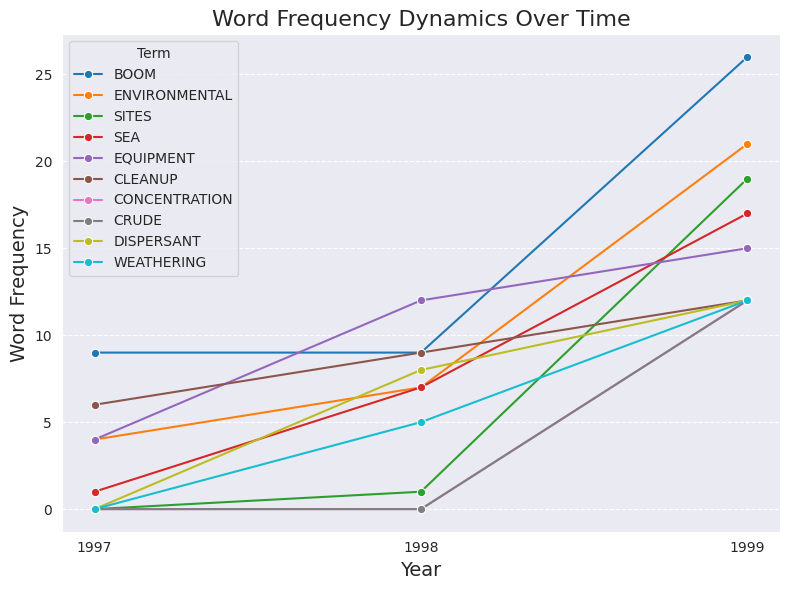

In [ ]:
# Carregar os dados do arquivo CSV da dinâmica de palavras
df_word_dynamics = pd.read_csv('/content/Word_Dynamics_1997-1999.csv')

# Transformar os dados em formato longo
df_long = df_word_dynamics.melt(id_vars='Year', var_name='Word', value_name='Frequency')

# Verificar a estrutura dos dados transformados
print(df_long.head())

# Carregar os dados de publicações por ano
publications_per_year = df_scopus_300424.groupby('Year').size().reset_index(name='Publications')

# Combinar os dados de dinâmica de palavras com o número de artigos por ano
df_combined = pd.merge(df_long, publications_per_year, on='Year', how='left')

# Verificar os dados combinados
print(df_combined.head())

# Plotar a frequência das palavras ao longo dos anos
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")

# Gráfico de linha para a frequência de palavras
sns.lineplot(data=df_combined, x='Year', y='Frequency', hue='Word', marker='o')

# Ajustar os labels e o título do gráfico
plt.title('Word Frequency Dynamics Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Word Frequency', fontsize=14)

# Ajustar o eixo x para mostrar apenas os anos sem frações
plt.xticks(df_combined['Year'].unique())

# Ajustar a posição da legenda para que não encubra os dados
plt.legend(loc='upper left', title='Term')

# Remover as linhas do grid que estão encobrindo a legenda
plt.grid(axis='x')
plt.grid(axis='y', linestyle='--')

# Mostrar o gráfico
plt.tight_layout()

plt.savefig('Word Frequency_1997-1999.png')
files.download('Word Frequency_1997-1999.png')
plt.show()

   Year           Word  Frequency
0  2009  ENVIRONMENTAL          7
1  2010  ENVIRONMENTAL         37
2  2011  ENVIRONMENTAL         58
3  2009         SYSTEM          7
4  2010         SYSTEM         36
   Year           Word  Frequency  Publications
0  2009  ENVIRONMENTAL          7            17
1  2010  ENVIRONMENTAL         37            51
2  2011  ENVIRONMENTAL         58            46
3  2009         SYSTEM          7            17
4  2010         SYSTEM         36            51


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

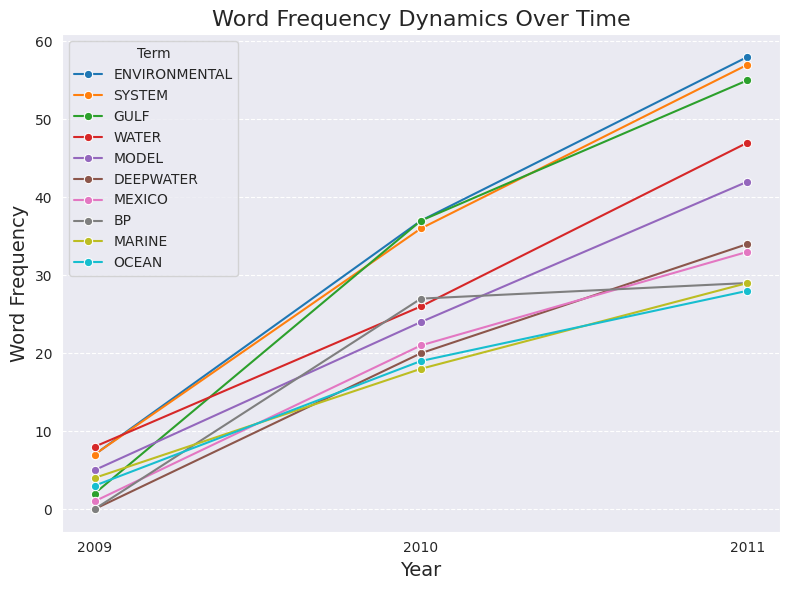

In [ ]:
# Carregar os dados do arquivo CSV da dinâmica de palavras
df_word_dynamics = pd.read_csv('/content/Word_Dynamics_2009-2011.csv')

# Transformar os dados em formato longo
df_long = df_word_dynamics.melt(id_vars='Year', var_name='Word', value_name='Frequency')

# Verificar a estrutura dos dados transformados
print(df_long.head())

# Carregar os dados de publicações por ano
publications_per_year = df_scopus_300424.groupby('Year').size().reset_index(name='Publications')

# Combinar os dados de dinâmica de palavras com o número de artigos por ano
df_combined = pd.merge(df_long, publications_per_year, on='Year', how='left')

# Verificar os dados combinados
print(df_combined.head())

# Plotar a frequência das palavras ao longo dos anos
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")

# Gráfico de linha para a frequência de palavras
sns.lineplot(data=df_combined, x='Year', y='Frequency', hue='Word', marker='o')

# Ajustar os labels e o título do gráfico
plt.title('Word Frequency Dynamics Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Word Frequency', fontsize=14)

# Ajustar o eixo x para mostrar apenas os anos sem frações
plt.xticks(df_combined['Year'].unique())

# Ajustar a posição da legenda para que não encubra os dados
plt.legend(loc='upper left', title='Term')

# Remover as linhas do grid que estão encobrindo a legenda
plt.grid(axis='x')
plt.grid(axis='y', linestyle='--')

# Mostrar o gráfico
plt.tight_layout()

plt.savefig('Word Frequency_2009-2011.png')
files.download('Word Frequency_2009-2011.png')
plt.show()

   Year        Word  Frequency
0  2018  DISPERSANT         65
1  2019  DISPERSANT        113
2  2020  DISPERSANT        141
3  2018       MODEL         28
4  2019       MODEL         69
   Year        Word  Frequency  Publications
0  2018  DISPERSANT         65            60
1  2019  DISPERSANT        113            56
2  2020  DISPERSANT        141            52
3  2018       MODEL         28            60
4  2019       MODEL         69            56


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

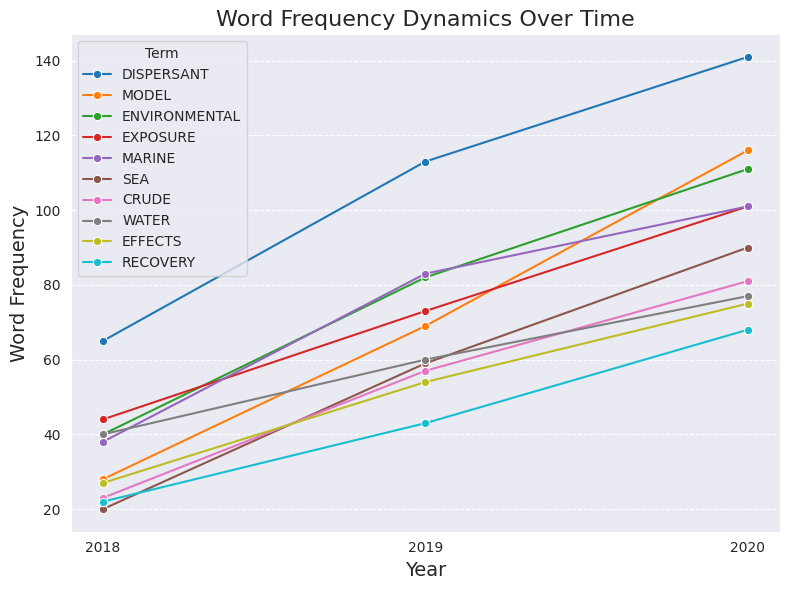

In [ ]:
# Carregar os dados do arquivo CSV da dinâmica de palavras
df_word_dynamics = pd.read_csv('/content/Word_Dynamics_2018-2020.csv')

# Transformar os dados em formato longo
df_long = df_word_dynamics.melt(id_vars='Year', var_name='Word', value_name='Frequency')

# Verificar a estrutura dos dados transformados
print(df_long.head())

# Carregar os dados de publicações por ano
publications_per_year = df_scopus_300424.groupby('Year').size().reset_index(name='Publications')

# Combinar os dados de dinâmica de palavras com o número de artigos por ano
df_combined = pd.merge(df_long, publications_per_year, on='Year', how='left')

# Verificar os dados combinados
print(df_combined.head())

# Plotar a frequência das palavras ao longo dos anos
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")

# Gráfico de linha para a frequência de palavras
sns.lineplot(data=df_combined, x='Year', y='Frequency', hue='Word', marker='o')

# Ajustar os labels e o título do gráfico
plt.title('Word Frequency Dynamics Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Word Frequency', fontsize=14)

# Ajustar o eixo x para mostrar apenas os anos sem frações
plt.xticks(df_combined['Year'].unique())

# Ajustar a posição da legenda para que não encubra os dados
plt.legend(loc='upper left', title='Term')

# Remover as linhas do grid que estão encobrindo a legenda
plt.grid(axis='x')
plt.grid(axis='y', linestyle='--')

# Mostrar o gráfico
plt.tight_layout()

plt.savefig('Word Frequency_2018-2020.png')
files.download('Word Frequency_2018-2020.png')
plt.show()

   Year  MODEL  CONTINGENCY  BOOM  EQUIPMENT  SHELL  SYSTEMS  CURRENT  \
0  1990      0            2     0          2      0        0        0   
1  1991      3            3     0          6      0        5        0   
2  1992     19            8     7          7      6        6        5   

   ENVIRONMENTAL  GEOGRAPHIC  INTEGRATED  
0              1           0           0  
1              2           2           1  
2              5           5           5  
   Year         Word  Frequency
0  1990        MODEL          0
1  1991        MODEL          3
2  1992        MODEL         19
3  1990  CONTINGENCY          2
4  1991  CONTINGENCY          3
   Year         Word  Frequency  Publications
0  1990        MODEL          0             3
1  1991        MODEL          3             6
2  1992        MODEL         19             9
3  1990  CONTINGENCY          2             3
4  1991  CONTINGENCY          3             6


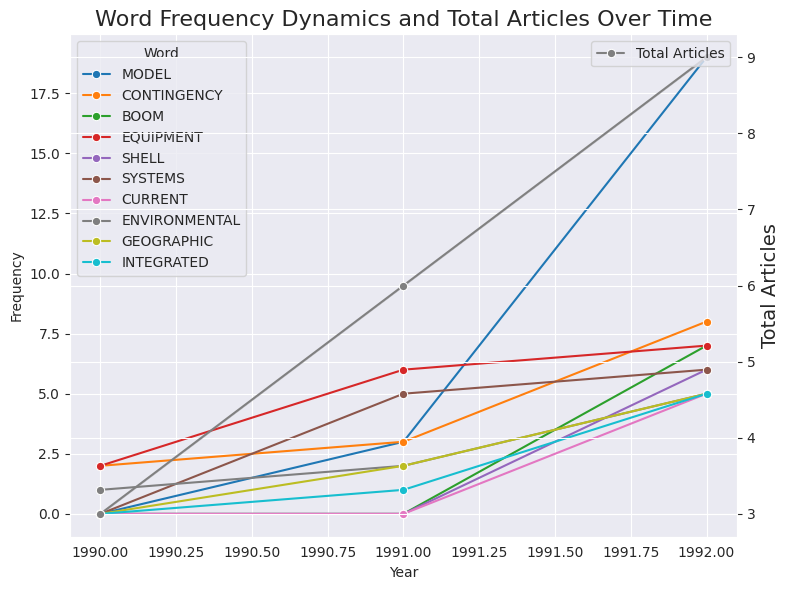

In [ ]:
# Carregar os dados do arquivo CSV da dinâmica de palavras
df_word_dynamics = pd.read_csv('/content/Word_Dynamics_1990-1992.csv')

# Verificar as primeiras linhas do DataFrame para entender sua estrutura
print(df_word_dynamics.head())

# Transformar os dados em formato longo
df_long = df_word_dynamics.melt(id_vars='Year', var_name='Word', value_name='Frequency')

# Verificar a estrutura dos dados transformados
print(df_long.head())

# Carregar os dados de publicações por ano
publications_per_year = df_scopus_300424.groupby('Year').size().reset_index(name='Publications')

# Combinar os dados de dinâmica de palavras com o número de artigos por ano
df_combined = pd.merge(df_long, publications_per_year, on='Year', how='left')

# Verificar os dados combinados
print(df_combined.head())

# Plotar a frequência das palavras ao longo dos anos
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")

# Gráfico de linha para a frequência de palavras
sns.lineplot(data=df_combined, x='Year', y='Frequency', hue='Word', marker='o')

# Criar um segundo eixo y para a quantidade de artigos
ax2 = plt.gca().twinx()
sns.lineplot(data=df_combined, x='Year', y='Publications', color='gray', ax=ax2, label='Total Articles', marker='o')

# Ajustar os labels e o título do gráfico
plt.title('Word Frequency Dynamics and Total Articles Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Word Frequency', fontsize=14)
ax2.set_ylabel('Total Articles', fontsize=14)

# Adicionar legendas
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Calcular a taxa de crescimento anual para cada par de anos consecutivos
taxas_crescimento = publicacoes_por_ano.pct_change().dropna() * 100  # Remover o primeiro ano que é NaN

# Calcular a mediana e o desvio padrão das taxas de crescimento anuais
mediana_crescimento = np.median(taxas_crescimento)
desvio_padrao_crescimento = np.std(taxas_crescimento)

print(f"Mediana das taxas de crescimento anuais: {mediana_crescimento:.2f}%")
print(f"Desvio padrão das taxas de crescimento anuais: {desvio_padrao_crescimento:.2f}%")

Mediana das taxas de crescimento anuais: 0.00%
Desvio padrão das taxas de crescimento anuais: 69.46%


In [ ]:
# Converter o índice (ano) para inteiro para remover decimais
publicacoes_por_ano.index = publicacoes_por_ano.index.astype(int)
taxas_crescimento.index = taxas_crescimento.index.astype(int)

# Ordenar as taxas de crescimento para encontrar os anos com maiores aumentos
maiores_crescimentos = taxas_crescimento.sort_values(ascending=False)

# Criar um DataFrame para exibir as informações juntas
resumo = pd.DataFrame({
    'Publicações': publicacoes_por_ano,
    'Taxa de Crescimento (%)': taxas_crescimento
})

# Ordenar as taxas de crescimento para encontrar os anos com maiores aumentos
maiores_crescimentos = taxas_crescimento.sort_values(ascending=False)

# Mostrar os top 5 anos com maior crescimento, formatando a saída
print("Anos com as maiores taxas de crescimento:")
print(maiores_crescimentos.head().apply(lambda x: f"{x:.2f}%"))

print("")

# Formatar a saída da taxa de crescimento
resumo['Taxa de Crescimento (%)'] = resumo['Taxa de Crescimento (%)'].apply(lambda x: f"{x:.2f}%")

# Exibir os dados
print(resumo)

Anos com as maiores taxas de crescimento:
Year
1999    200.00%
2010    200.00%
1990    200.00%
2006    160.00%
2009    142.86%
dtype: object

      Publicações Taxa de Crescimento (%)
Year                                     
1973            1                    nan%
1980            2                 100.00%
1982            2                   0.00%
1983            4                 100.00%
1984            3                 -25.00%
1985            4                  33.33%
1986            1                 -75.00%
1987            1                   0.00%
1988            1                   0.00%
1989            1                   0.00%
1990            3                 200.00%
1991            6                 100.00%
1992            9                  50.00%
1993           12                  33.33%
1994           10                 -16.67%
1995           18                  80.00%
1996            9                 -50.00%
1997           11                  22.22%
1998            8 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

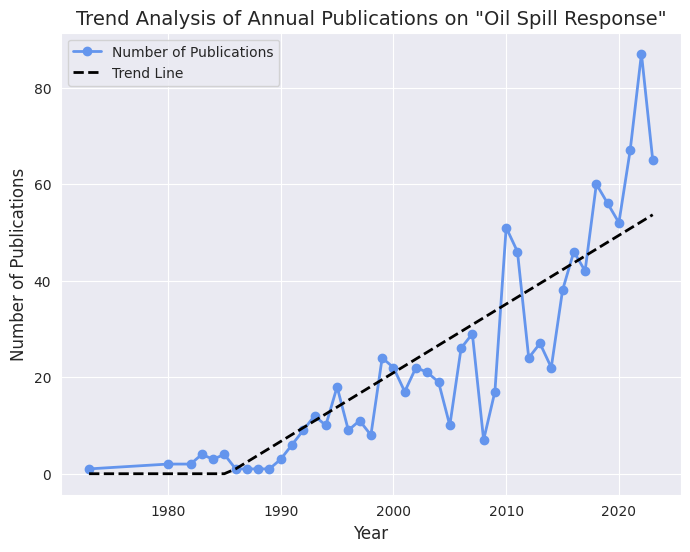

In [ ]:
# Agrupar os dados por ano e contar as publicações
publicacoes_por_ano = df_scopus_300424.groupby('Year').size()

# Converter o índice (ano) para inteiro para remover decimais
publicacoes_por_ano.index = publicacoes_por_ano.index.astype(int)

# Configurar o tamanho e estilo do gráfico
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")  # Um estilo de grade mais suave

# Plotar o número de publicações por ano
plt.plot(publicacoes_por_ano.index, publicacoes_por_ano, label='Number of Publications', marker='o', color='cornflowerblue', linewidth=2)

# Calcular a linha de tendência
z = np.polyfit(publicacoes_por_ano.index, publicacoes_por_ano, 1)
p = np.poly1d(z)

# Gerar valores de y para a linha de tendência
tendencia_y = p(publicacoes_por_ano.index)

# Ajustar valores negativos, se houver, para zero
tendencia_y[tendencia_y < 0] = 0

# Adicionar a linha de tendência ao gráfico
plt.plot(publicacoes_por_ano.index, tendencia_y, label='Trend Line', linestyle='--', color='black', linewidth=2)

# Adicionar títulos e labels em inglês acadêmico
plt.title('Trend Analysis of Annual Publications on "Oil Spill Response"', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Publications', fontsize=12)
plt.legend()

# Ajustar os ticks para maior legibilidade
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar o gráfico

plt.savefig('Annual Publication Count with Trend Line.png')
files.download('Annual Publication Count with Trend Line.png')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

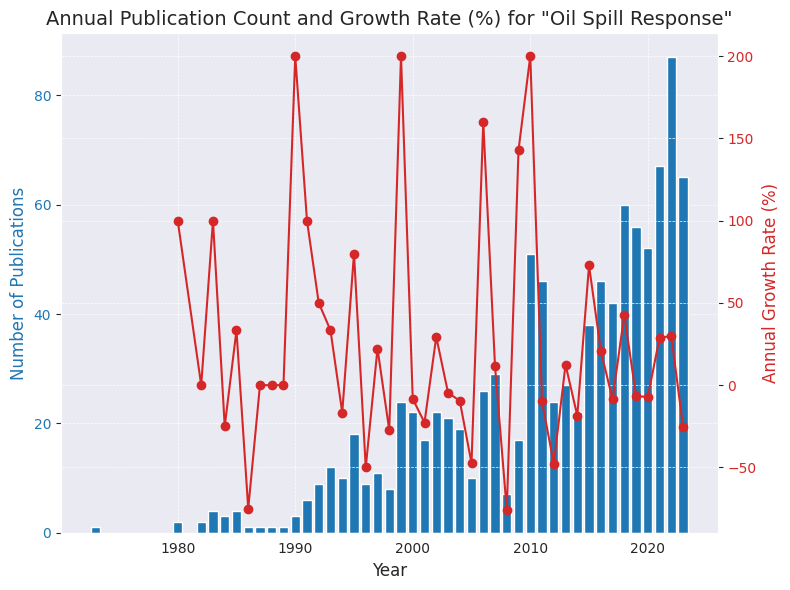

In [ ]:
# Agrupar os dados por ano e contar as publicações
publicacoes_por_ano = df_scopus_300424.groupby('Year').size()

# Calcular a taxa de crescimento percentual para cada ano
taxas_crescimento = publicacoes_por_ano.pct_change() * 100
taxas_crescimento = taxas_crescimento.dropna()  # Removendo NaN

# Criar uma figura e um eixo
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotar o número de publicações como barras
color = 'tab:blue'
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Number of Publications', color=color, fontsize=12)
ax1.bar(publicacoes_por_ano.index, publicacoes_por_ano, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)  # Adiciona uma grade para facilitar a leitura dos dados

# Criar um segundo eixo para a taxa de crescimento
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Annual Growth Rate (%)', color=color, fontsize=12)
# Plotar a variação percentual, certificando-se de alinhar os índices corretamente
ax2.plot(publicacoes_por_ano.index[1:], taxas_crescimento, color=color, marker='o')  # Corrigido para usar o índice ajustado
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adicionar título e mostrar o gráfico
plt.title('Annual Publication Count and Growth Rate (%) for "Oil Spill Response"', fontsize=14)
plt.tight_layout()  # Ajusta o layout para não haver sobreposição de elementos


plt.savefig('Publications and Annual Growth Rate.png')
files.download('Publications and Annual Growth Rate.png')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

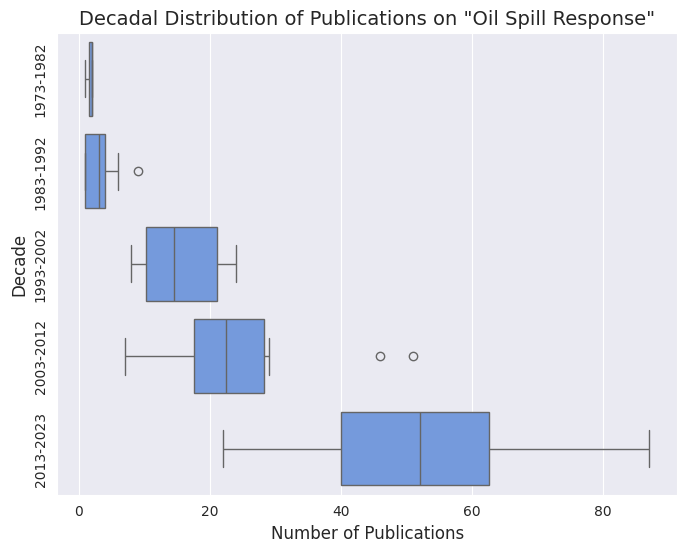

In [ ]:
# Criar uma nova coluna 'Decade' para agrupar os dados por década
# Fórmula para calcular a década de cada ano
publicacoes_por_ano.index = pd.cut(publicacoes_por_ano.index, bins=[1973, 1983, 1993, 2003, 2013, 2024], right=False, labels=['1973-1982', '1983-1992', '1993-2002', '2003-2012', '2013-2023'])

# Converter as publicações por ano para um DataFrame para uso em seaborn
publicacoes_por_decada = publicacoes_por_ano.reset_index()
publicacoes_por_decada.columns = ['Decade', 'Publications']


# Ajustando para inglês acadêmico e melhorando a visualização
plt.figure(figsize=(8, 6))  # Ajusta o tamanho do gráfico para uma melhor visualização
sns.set_style("darkgrid")
sns.boxplot(x='Publications', y='Decade', data=publicacoes_por_decada, orient='h', color='cornflowerblue')
plt.title('Decadal Distribution of Publications on "Oil Spill Response"', fontsize=14)  # Título em inglês
plt.xlabel('Number of Publications', fontsize=12)  # Rótulo do eixo X em inglês
plt.ylabel('Decade', fontsize=12)  # Rótulo do eixo Y em inglês
plt.yticks(rotation=90, va='center', fontsize=10)
plt.xticks(rotation=0, fontsize=10)

plt.savefig('Decadal Distribution.png')
files.download('Decadal Distribution.png')

plt.show()

In [ ]:
publicacoes_por_decada

,Decade,Publications
0,1973-1982,1
1,1973-1982,2
2,1973-1982,2
3,1983-1992,4
4,1983-1992,3
5,1983-1992,4
6,1983-1992,1
7,1983-1992,1
8,1983-1992,1
9,1983-1992,1


{'1973-1982': [], '1983-1992': [1992], '1993-2002': [], '2003-2012': [2010, 2011], '2013-2023': []}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

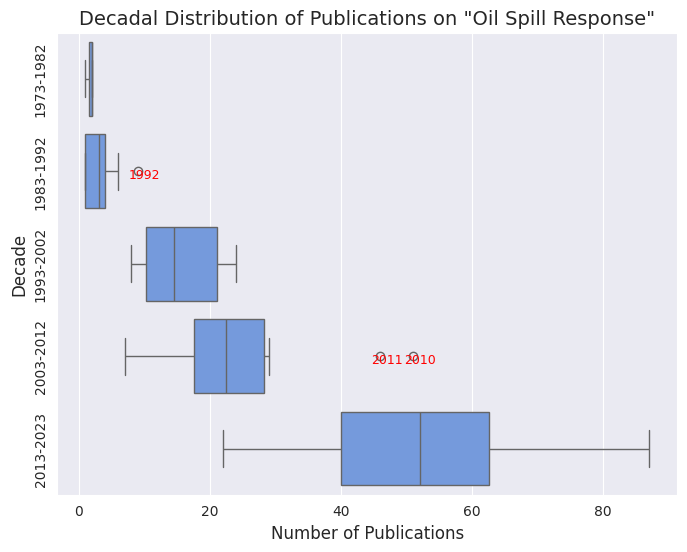

In [ ]:
# Agrupar os dados por ano e contar as publicações
publicacoes_por_ano = df_scopus_300424.groupby('Year').size().reset_index(name='Publications')

# Criar uma nova coluna 'Decade' para agrupar os dados por década
publicacoes_por_ano['Decade'] = pd.cut(publicacoes_por_ano['Year'], bins=[1973, 1983, 1993, 2003, 2013, 2024], right=False, labels=['1973-1982', '1983-1992', '1993-2002', '2003-2012', '2013-2023'])

# Ajustando para inglês acadêmico e melhorando a visualização
plt.figure(figsize=(8, 6))  # Ajusta o tamanho do gráfico para uma melhor visualização
sns.set_style("darkgrid")
ax = sns.boxplot(x='Publications', y='Decade', data=publicacoes_por_ano, orient='h', color='cornflowerblue')
plt.title('Decadal Distribution of Publications on "Oil Spill Response"', fontsize=14)  # Título em inglês
plt.xlabel('Number of Publications', fontsize=12)  # Rótulo do eixo X em inglês
plt.ylabel('Decade', fontsize=12)  # Rótulo do eixo Y em inglês
plt.yticks(rotation=90, va='center', fontsize=10)
plt.xticks(rotation=0, fontsize=10)

# Identificar e listar anos que são outliers
grouped = publicacoes_por_ano.groupby('Decade')
outliers = {}

for name, group in grouped:
    q1 = group['Publications'].quantile(0.25)
    q3 = group['Publications'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filtrando outliers
    decade_outliers = group[(group['Publications'] < lower_bound) | (group['Publications'] > upper_bound)]
    outliers[name] = decade_outliers['Year'].tolist()

    # Adicionando anotações para cada outlier diretamente no gráfico
    for _, outlier in decade_outliers.iterrows():
        ax.annotate(outlier['Year'], (outlier['Publications'], name), textcoords="offset points", xytext=(5, -5), ha='center', fontsize=9, color='red')

# Mostrar os outliers identificados
print(outliers)

# Salvar a figura antes de mostrar
plt.savefig('Decadal Distribution.png')

# Baixar o arquivo salvo
files.download('Decadal Distribution.png')

plt.show()

In [ ]:
publicacoes_por_ano

,Year,Publications,Decade
0,1973,1,1973-1982
1,1980,2,1973-1982
2,1982,2,1973-1982
3,1983,4,1983-1992
4,1984,3,1983-1992
5,1985,4,1983-1992
6,1986,1,1983-1992
7,1987,1,1983-1992
8,1988,1,1983-1992
9,1989,1,1983-1992


{'1973-1982': [], '1983-1992': [1992], '1993-2002': [], '2003-2012': [2010, 2011], '2013-2023': []}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

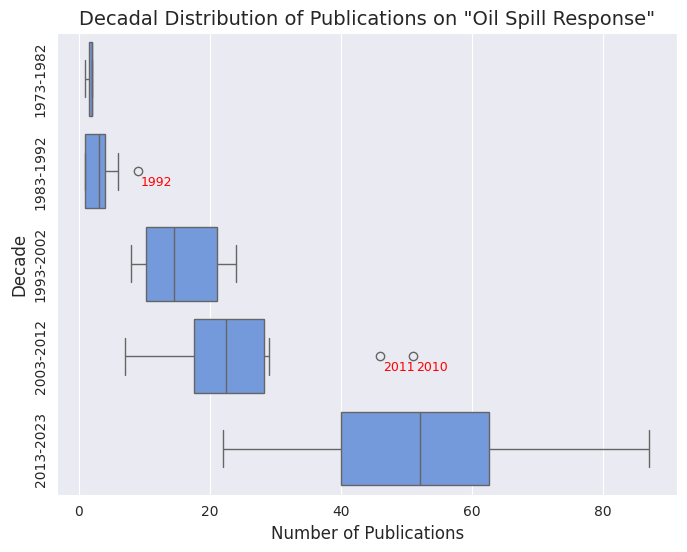

In [ ]:
# Agrupar os dados por ano e contar as publicações
publicacoes_por_ano = df_scopus_300424.groupby('Year').size().reset_index(name='Publications')

# Criar uma nova coluna 'Decade' para agrupar os dados por década
publicacoes_por_ano['Decade'] = pd.cut(publicacoes_por_ano['Year'], bins=[1973, 1983, 1993, 2003, 2013, 2024], right=False, labels=['1973-1982', '1983-1992', '1993-2002', '2003-2012', '2013-2023'])

# Ajustando para inglês acadêmico e melhorando a visualização
plt.figure(figsize=(8, 6))  # Ajusta o tamanho do gráfico para uma melhor visualização
sns.set_style("darkgrid")
ax = sns.boxplot(x='Publications', y='Decade', data=publicacoes_por_ano, orient='h', color='cornflowerblue')
plt.title('Decadal Distribution of Publications on "Oil Spill Response"', fontsize=14)  # Título em inglês
plt.xlabel('Number of Publications', fontsize=12)  # Rótulo do eixo X em inglês
plt.ylabel('Decade', fontsize=12)  # Rótulo do eixo Y em inglês
plt.yticks(rotation=90, va='center', fontsize=10)
plt.xticks(rotation=0, fontsize=10)

# Identificar e listar anos que são outliers
grouped = publicacoes_por_ano.groupby('Decade')
outliers = {}

for name, group in grouped:
    q1 = group['Publications'].quantile(0.25)
    q3 = group['Publications'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filtrando outliers
    decade_outliers = group[(group['Publications'] < lower_bound) | (group['Publications'] > upper_bound)]
    outliers[name] = decade_outliers['Year'].tolist()

    # Adicionando anotações para cada outlier diretamente no gráfico
    for _, outlier in decade_outliers.iterrows():
        ax.annotate(outlier['Year'], (outlier['Publications'], name), textcoords="offset points", xytext=(2, -10), ha='left', fontsize=9, color='red')

# Mostrar os outliers identificados
print(outliers)

# Salvar a figura antes de mostrar
plt.savefig('Decadal Distribution.png')

# Baixar o arquivo salvo
files.download('Decadal Distribution.png')

plt.show()

Dados originais:
                                             Authors  \
0  Grechishcheva N.Yu.; Korolev A.M.; Zavorotny V...   
1                            Hasan M.I.; Aggarwal S.   
2                               Das T.; Goerlandt F.   
3            Letendre F.; Ramos P.A.S.; Cameron C.B.   
4      Li W.; Yu Y.; Xiong D.; Qi Z.; Wang W.; Qi Y.   

                                   Author full names  \
0  Grechishcheva, N.Yu. (6506505881); Korolev, A....   
1  Hasan, Md Ibnul (57920061700); Aggarwal, Srija...   
2  Das, Tanmoy (57226797978); Goerlandt, Floris (...   
3  Letendre, Francis (57200414616); Ramos, Paloma...   
4  Li, Wenxin (57210647142); Yu, Yue (57206250592...   

                                        Author(s) ID  \
0  6506505881; 58045467900; 57219162635; 58045851...   
1                           57920061700; 16038160400   
2                           57226797978; 36504143700   
3              57200414616; 58316661000; 57210868446   
4  57210647142; 57206250592; 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

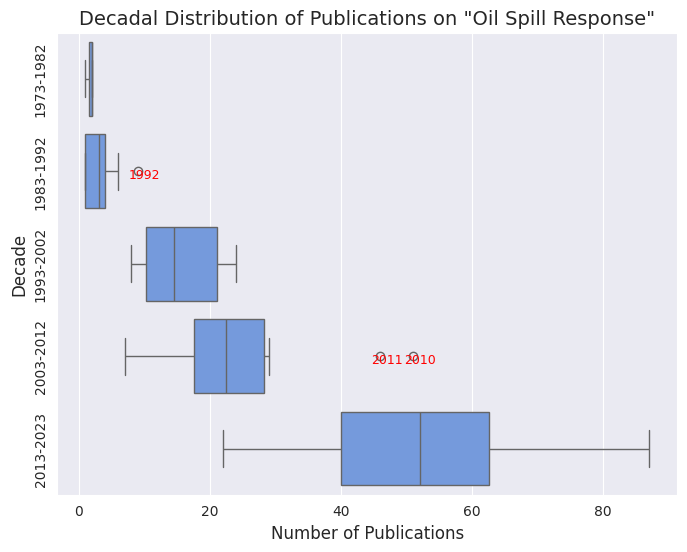

In [ ]:
# Verificar os dados originais
print("Dados originais:")
print(df_scopus_300424.head())
print(f"\nTotal de artigos: {len(df_scopus_300424)}")

# Verificar a distribuição dos anos
print("\nDistribuição dos anos:")
print(df_scopus_300424['Year'].value_counts().sort_index())

# Certificar-se de que a coluna 'Year' está no formato numérico
df_scopus_300424['Year'] = pd.to_numeric(df_scopus_300424['Year'], errors='coerce')

# Agrupar os dados por ano e contar as publicações
publicacoes_por_ano = df_scopus_300424.groupby('Year').size().reset_index(name='Publications')

# Verificar se a coluna 'Publications' está correta
print("\nPublicações por ano:")
print(publicacoes_por_ano)

# Criar uma nova coluna 'Decade' para agrupar os dados por década
publicacoes_por_ano['Decade'] = pd.cut(publicacoes_por_ano['Year'], bins=[1973, 1983, 1993, 2003, 2013, 2024], right=False, labels=['1973-1982', '1983-1992', '1993-2002', '2003-2012', '2013-2023'])

# Verificar se a coluna de décadas foi adicionada corretamente
print("\nDados com a coluna 'Decade':")
print(publicacoes_por_ano)

# Contar o número de publicações por década
contagem_por_decada = publicacoes_por_ano.groupby('Decade')['Publications'].sum()

# Calcular a soma total das publicações
contagem_total = publicacoes_por_ano['Publications'].sum()

# Exibir os resultados
print("\nNúmero de publicações por década:")
print(contagem_por_decada)
print("\nNúmero total de publicações:")
print(contagem_total)

# Verificar os artigos que não foram incluídos em nenhuma década
artigos_fora_das_decadas = publicacoes_por_ano[publicacoes_por_ano['Decade'].isna()]
print("\nArtigos fora das décadas:")
print(artigos_fora_das_decadas)

# Verificar o número total de artigos fora das décadas
print(f"\nTotal de artigos fora das décadas: {len(artigos_fora_das_decadas)}")

# Ajustando para inglês acadêmico e melhorando a visualização
plt.figure(figsize=(8, 6))  # Ajusta o tamanho do gráfico para uma melhor visualização
sns.set_style("darkgrid")
ax = sns.boxplot(x='Publications', y='Decade', data=publicacoes_por_ano, orient='h', color='cornflowerblue')
plt.title('Decadal Distribution of Publications on "Oil Spill Response"', fontsize=14)  # Título em inglês
plt.xlabel('Number of Publications', fontsize=12)  # Rótulo do eixo X em inglês
plt.ylabel('Decade', fontsize=12)  # Rótulo do eixo Y em inglês
plt.yticks(rotation=90, va='center', fontsize=10)
plt.xticks(rotation=0, fontsize=10)

# Identificar e listar anos que são outliers
grouped = publicacoes_por_ano.groupby('Decade')
outliers = {}

for name, group in grouped:
    q1 = group['Publications'].quantile(0.25)
    q3 = group['Publications'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filtrando outliers
    decade_outliers = group[(group['Publications'] < lower_bound) | (group['Publications'] > upper_bound)]
    outliers[name] = decade_outliers['Year'].tolist()

    # Adicionando anotações para cada outlier diretamente no gráfico
    for _, outlier in decade_outliers.iterrows():
        ax.annotate(outlier['Year'], (outlier['Publications'], name), textcoords="offset points", xytext=(5, -5), ha='center', fontsize=9, color='red')

# Mostrar os outliers identificados
print(outliers)

# Salvar a figura antes de mostrar
plt.savefig('Decadal Distribution.png')

# Baixar o arquivo salvo
files.download('Decadal Distribution.png')

plt.show()

In [ ]:
df_word_freq_73 = pd.read_csv("/content/Most_Frequent_Words_1973-1982.csv")
# Verificar os dados carregados
print("Dados carregados do CSV:")
print(df_word_freq_73.head())

Dados carregados do CSV:
          Terms  Frequency
0     equipment          7
1    capability          4
2       cleanup          4
3  cooperatives          4
4        norway          3


In [ ]:
# Preparar os dados para a nuvem de palavras
# Criar um dicionário a partir do DataFrame
word_freq = dict(zip(df_word_freq_73['Terms'], df_word_freq_73['Frequency']))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

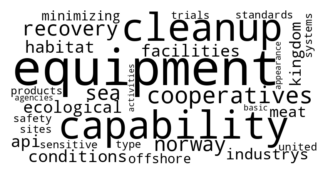

In [ ]:
# Criar um colormap totalmente preto
black_colormap = LinearSegmentedColormap.from_list("my_black", ["black", "black"], N=256)

# Gerar a nuvem de palavras com uma paleta de cores personalizada
# Algumas opções de colormaps: 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Blues', 'Reds', etc.
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=black_colormap).generate_from_frequencies(word_freq)

# Exibir a nuvem de palavras usando matplotlib
plt.figure(figsize=(4, 2))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Salvar a figura antes de mostrar
plt.savefig('wordcloud_73.png',dpi=300)

# Baixar o arquivo salvo
files.download('wordcloud_73.png')

plt.show()

In [ ]:
df_word_freq_83 = pd.read_csv("/content/Most_Frequent_Words_1983-1992.csv")
# Verificar os dados carregados
print("Dados carregados do CSV:")
print(df_word_freq_83.head())

Dados carregados do CSV:
         Terms  Frequency
0        model         27
1    equipment         15
2    pollution         11
3  contingency         10
4   government         10


In [ ]:
# Preparar os dados para a nuvem de palavras
# Criar um dicionário a partir do DataFrame
word_freq = dict(zip(df_word_freq_83['Terms'], df_word_freq_83['Frequency']))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

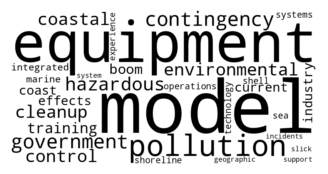

In [ ]:
# Criar um colormap totalmente preto
black_colormap = LinearSegmentedColormap.from_list("my_black", ["black", "black"], N=256)

# Gerar a nuvem de palavras com uma paleta de cores personalizada
# Algumas opções de colormaps: 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Blues', 'Reds', etc.
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=black_colormap).generate_from_frequencies(word_freq)

# Exibir a nuvem de palavras usando matplotlib
plt.figure(figsize=(4, 2))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Salvar a figura antes de mostrar
plt.savefig('wordcloud_83.png',dpi=300)

# Baixar o arquivo salvo
files.download('wordcloud_83.png')

plt.show()

In [ ]:
df_word_freq = pd.read_csv("/content/Most_Frequent_Words_1993-2002.csv")
# Verificar os dados carregados
print("Dados carregados do CSV:")
print(df_word_freq.head())

Dados carregados do CSV:
           Terms  Frequency
0  environmental         98
1          model         73
2         system         60
3          water         58
4      equipment         53


In [ ]:
# Preparar os dados para a nuvem de palavras
# Criar um dicionário a partir do DataFrame
word_freq = dict(zip(df_word_freq['Terms'], df_word_freq['Frequency']))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

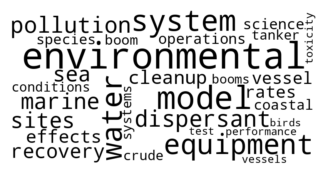

In [ ]:
# Criar um colormap totalmente preto
black_colormap = LinearSegmentedColormap.from_list("my_black", ["black", "black"], N=256)

# Gerar a nuvem de palavras com uma paleta de cores personalizada
# Algumas opções de colormaps: 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Blues', 'Reds', etc.
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=black_colormap).generate_from_frequencies(word_freq)

# Exibir a nuvem de palavras usando matplotlib
plt.figure(figsize=(4, 2))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Salvar a figura antes de mostrar
plt.savefig('wordcloud_93.png',dpi=300)

# Baixar o arquivo salvo
files.download('wordcloud_93.png')

plt.show()

In [ ]:
df_word_freq_2003 = pd.read_csv("/content/Most_Frequent_Words_2003-2012.csv")
# Verificar os dados carregados
print("Dados carregados do CSV:")
print(df_word_freq_2003.head())

Dados carregados do CSV:
           Terms  Frequency
0  environmental        131
1         system        116
2          model        112
3          water         91
4         marine         80


In [ ]:
# Preparar os dados para a nuvem de palavras
# Criar um dicionário a partir do DataFrame
word_freq = dict(zip(df_word_freq_2003['Terms'], df_word_freq_2003['Frequency']))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

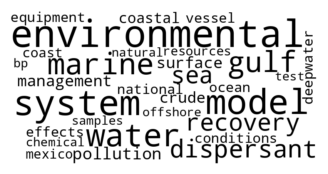

In [ ]:
# Criar um colormap totalmente preto
black_colormap = LinearSegmentedColormap.from_list("my_black", ["black", "black"], N=256)

# Gerar a nuvem de palavras com uma paleta de cores personalizada
# Algumas opções de colormaps: 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Blues', 'Reds', etc.
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=black_colormap).generate_from_frequencies(word_freq)

# Exibir a nuvem de palavras usando matplotlib
plt.figure(figsize=(4, 2))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Salvar a figura antes de mostrar
plt.savefig('wordcloud_2003.png',dpi=300)

# Baixar o arquivo salvo
files.download('wordcloud_2003.png')

plt.show()

In [ ]:
df_word_freq_2013 = pd.read_csv("/content/Most_Frequent_Words_2013-2023.csv")
# Verificar os dados carregados
print("Dados carregados do CSV:")
print(df_word_freq_2003.head())

Dados carregados do CSV:
           Terms  Frequency
0  environmental        131
1         system        116
2          model        112
3          water         91
4         marine         80


In [ ]:
# Preparar os dados para a nuvem de palavras
# Criar um dicionário a partir do DataFrame
word_freq = dict(zip(df_word_freq_2013['Terms'], df_word_freq_2013['Frequency']))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

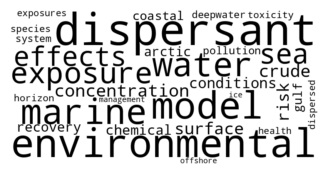

In [ ]:
# Criar um colormap totalmente preto
black_colormap = LinearSegmentedColormap.from_list("my_black", ["black", "black"], N=256)

# Gerar a nuvem de palavras com uma paleta de cores personalizada
# Algumas opções de colormaps: 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Blues', 'Reds', etc.
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=black_colormap).generate_from_frequencies(word_freq)

# Exibir a nuvem de palavras usando matplotlib
plt.figure(figsize=(4, 2))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Salvar a figura antes de mostrar
plt.savefig('wordcloud_2013.png',dpi=300)

# Baixar o arquivo salvo
files.download('wordcloud_2013.png')

plt.show()

In [ ]:
df_word_freq_benthic = pd.read_csv("/content/Most_Frequent_Words_benthic.csv")
# Verificar os dados carregados
print("Dados carregados do CSV:")
print(df_word_freq_benthic.head(10))

Dados carregados do CSV:
           Terms  Frequency
0     dispersant         79
1  environmental         77
2        effects         71
3         marine         69
4      sediments         61
5    communities         54
6          sites         52
7  concentration         48
8      dispersed         46
9            sea         45


In [ ]:
# Preparar os dados para a nuvem de palavras
# Criar um dicionário a partir do DataFrame
benthic_word_freq = dict(zip(df_word_freq_benthic['Terms'], df_word_freq_benthic['Frequency']))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

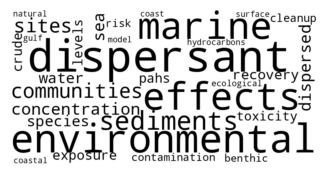

In [ ]:
# Criar um colormap totalmente preto
black_colormap = LinearSegmentedColormap.from_list("my_black", ["black", "black"], N=256)

# Gerar a nuvem de palavras com uma paleta de cores personalizada
# Algumas opções de colormaps: 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Blues', 'Reds', etc.
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=black_colormap).generate_from_frequencies(benthic_word_freq)

# Exibir a nuvem de palavras usando matplotlib
plt.figure(figsize=(4, 2))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Salvar a figura antes de mostrar
plt.savefig('wordcloud_benthic.png',dpi=300)

# Baixar o arquivo salvo
files.download('wordcloud_benthic.png')

plt.show()

colors: 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r'